#IMPORTACIÓN DE LIBRERÍAS

In [82]:
import numpy as np
import scipy.linalg as la
import matplotlib,pylab as plt

#CÓDIGO DESCIFRADO

In [83]:
#Se establecen las dos listas, una correspondiente a números y otra al abecedario

abc=['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z',' ']
num=['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27']

In [84]:
#Se define un diccionario con las listas previas

d = dict(zip(num,abc))
print(d)

{'1': 'A', '2': 'B', '3': 'C', '4': 'D', '5': 'E', '6': 'F', '7': 'G', '8': 'H', '9': 'I', '10': 'J', '11': 'K', '12': 'L', '13': 'M', '14': 'N', '15': 'O', '16': 'P', '17': 'Q', '18': 'R', '19': 'S', '20': 'T', '21': 'U', '22': 'V', '23': 'W', '24': 'X', '25': 'Y', '26': 'Z', '27': ' '}


In [85]:
#Se define la matriz de código

A = np.array( [[1, 2,-3, 4, 5],
               [-2,-5,8,-8,-9],
               [1, 2,-2, 7, 9],
               [1, 1, 0, 6,12],
               [2, 4,-6, 8,11]] )

A = np.asmatrix(A)

In [86]:
A_I = A.I  #Inversión de la matriz de código

In [87]:
#Matriz del mensaje cifrado

B = np.array( [[47, 49,-19, 257,487],
               [10,-9, 63, 137, 236],
               [79,142,-184,372,536],
               [59,70,-40, 332, 588]] )

B = np.asmatrix(B)

In [88]:
#Operación para el desencriptado

M = B@A_I
M = M.round().astype('int')
M

matrix([[ 1, 18,  5, 27, 25],
        [15, 21, 27,  8,  1],
        [22,  9, 14,  7, 27],
        [ 6, 21, 14, 27, 27]])

In [89]:
#Escribimos el mensaje

print( 'El mensaje descifrado es:\n' )
m = ''
for i in range( len(M) ):
  for j in range( M.shape[1] ):
    m += d[f'{M[(i,j)]}']
print(m)

El mensaje descifrado es:

ARE YOU HAVING FUN  


#MULTIPLICACIÓN DE MATRICES

In [90]:
def x(matrix1, matrix2):
  
  matrix1 = np.asmatrix(matrix1)
  matrix2 = np.asmatrix(matrix2)

  columns1 = matrix1.shape[1]       #Número de columnas de la primera matriz...
  rows2 = matrix2.shape[0]    #Debe ser igual al número de filas de la segunda matriz
  
  #La matriz resultante será del tamaño del número de filas de la matriz 1 por el número de columnas de la matriz 2 
  rows1 = matrix1.shape[0]
  columns2 = matrix2.shape[1]

  Matrix = np.zeros( (rows1, columns2) )  #Definimos la matriz de ceros. Esta matriz, al modificarse, será la matriz resultante

  if columns1 != rows2:
    print( 'Error : Las matrices deben ser compatibles para la multiplicación' )
  
  #Hacemos producto escalar entre cada fila de la primera matriz, con cada columna de la segunda matriz
  #De esta manera es como se van definiendo las posiciones de la matriz resultante
  elif columns1 == rows2:
    for i in range( rows1 ):
      for j in range( columns2 ):
        Matrix[(i,j)] = np.dot( matrix1[i],np.c_[matrix2[:,j]] )
    
    return Matrix

#Nótese que el código funciona incluso para números, tratándolos como matrices de 1x1

* **Pruebas:**

In [91]:
M = np.array([np.random.randint(0, 20, 3), np.random.randint(0, 20, 3),np.random.randint(0, 20, 3)])
M

array([[14, 13, 12],
       [ 2,  7,  5],
       [ 9,  8, 13]])

In [92]:
B = np.array([np.random.randint(0, 20, 4), np.random.randint(0, 20, 4),np.random.randint(0, 20, 4)])
B

array([[ 4,  6, 18, 19],
       [10, 19,  1,  8],
       [11,  2,  9,  8]])

In [93]:
M_1 = x(M,M)
M_1

array([[330., 369., 389.],
       [ 87., 115., 124.],
       [259., 277., 317.]])

In [94]:
M_2 = np.dot(M,M)
M_2

array([[330, 369, 389],
       [ 87, 115, 124],
       [259, 277, 317]])

In [95]:
M_1 == M_2

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

In [96]:
x(B,M)

Error : Las matrices deben ser compatibles para la multiplicación


In [97]:
#np.dot(B,M) ---> Al ejecutar esta línea sale un ValueError, lo que indica que las matrices son incompatibles para el producto

In [98]:
MB_1 = x(M,B)
MB_1

array([[318., 355., 373., 466.],
       [133., 155.,  88., 134.],
       [259., 232., 287., 339.]])

In [99]:
MB_2 = np.dot(M,B)
MB_2

array([[318, 355, 373, 466],
       [133, 155,  88, 134],
       [259, 232, 287, 339]])

In [100]:
MB_1 == MB_2

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

#Parte Final

Se sabe que un sistema físico es gobernado por las ecuaciones,



$$
\begin{matrix}
x' &=& 2x&-y&+z \\
y' &=&   &3y&-1z \\
z' &=& 2x&+y&+3z
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.<br> 

a) Diagonalize $A$.<br> \\

b) Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.<br>. \\

c) Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.<br> \\

d) Compare el resultado a la solución analítica,

$$
\begin{align}
2x & = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})), \\
2y & = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})), \\
2z & = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
\end{align}
$$ 

In [134]:
#Definimos la matriz de coeficientes

x1 = np.array([2, -1, 1])
x2 = np.array([0, 3, -1])
x3 = np.array([2, 1, +3])

A = np.asmatrix([x1,x2,x3])

In [135]:
#Encontramos auto-(vectores, valores) de A

E, U = la.eig(A) 
U = np.asmatrix(U)

In [136]:
#Diagonalizamos A

D = U.I @ (A @U)
D.round()

matrix([[ 4.-0.j, -0.+0.j, -0.+0.j],
        [-0.-0.j,  2.+0.j,  0.-0.j],
        [-0.+0.j,  0.+0.j,  2.-0.j]])

In [137]:
E.round() #Autovalores

array([4.+0.j, 2.+0.j, 2.-0.j])

In [138]:
#Nótese que sí se cumple que D es igual a la matriz diagonal de autovalores

np.diag(E,0).round()

array([[4.+0.j, 0.+0.j, 0.+0.j],
       [0.+0.j, 2.+0.j, 0.+0.j],
       [0.+0.j, 0.+0.j, 2.-0.j]])

In [139]:
#Definimos la función encontrada por la EDO

f = lambda t: np.exp(E*t) 
f(0)

array([1.+0.j, 1.+0.j, 1.+0.j])

In [140]:
#En t = 0
r0=np.array([1,1,2])
Diagonal = np.diag(f(0), 0)
f_A0 = U @ (Diagonal @ U.I)
r_0 = f_A0 @ r0

In [141]:
f_A0.round()

matrix([[ 1.+0.j,  0.+0.j,  0.-0.j],
        [ 0.+0.j,  1.+0.j,  0.+0.j],
        [-0.-0.j,  0.-0.j,  1.-0.j]])

In [142]:
r_0.round()

matrix([[1.+0.j, 1.+0.j, 2.-0.j]])

In [143]:
#Definimos el intervalo como se indica en el problema y convertimos a lista convenientemente
t = np.linspace(0,2,100)
t = list(t)

#Definimos una matriz de ceros
Matriz = np.zeros( (len(t), 3) ) #Esta matriz tendrá en cada fila el vector r correspondiente a cada t en [0,2]

#De esta manera rellenamos la matriz con cada r en cada t.
for value in t:
  Diagonal = np.diag( f(value),0 )
  f_A = U @ (Diagonal @ U.I)
  r = f_A @ r0
  Matriz[t.index(value)] = r

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: ComplexWarning: Casting complex values to real discards the imaginary part
  del sys.path[0]


In [144]:
#Para cada componente x,y,z separamos sus valores correspondientes en la matriz de la celda anterior

x = np.zeros(len(t))
for i in range(len(t)):
  x[i] = Matriz[(i,0)]

y = np.zeros(len(t))
for i in range(len(t)):
  y[i] = Matriz[(i,1)]

z = np.zeros(len(t))
for i in range(len(t)):
  z[i] = Matriz[(i,2)]

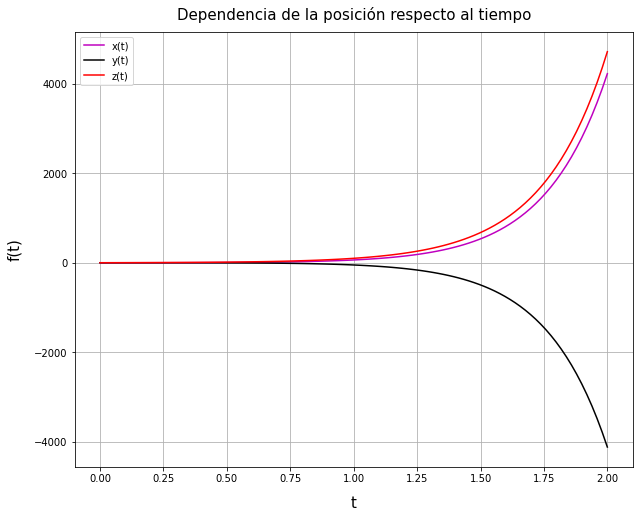

In [145]:
#Graficación

plt.figure( figsize=(10,8) )

plt.plot( t, x, 'm-', label='x(t)' )
plt.plot( t, y, 'k-', label='y(t)' )
plt.plot( t, z, 'r-', label='z(t)' )

plt.xlabel( 't', size=15, labelpad=12 )
plt.ylabel( 'f(t)', size=15, labelpad=12 )
plt.title( 'Dependencia de la posición respecto al tiempo', pad=12, size=15 )

plt.legend()
plt.grid()

* **Comparación**

In [146]:
#Definimos los resultados de x,y,z que se hallaron de forma analítica

r0 = np.array([1,1,2])

x1 = lambda t: 0.5*( r0[0]*(np.exp(2*t)*(1+np.exp(2*t)-2*t)) + r0[1]*(-2*t*np.exp(2*t)) + r0[2]*(np.exp(2*t)*(-1+np.exp(2*t))) )
y1 = lambda t: 0.5*( r0[0]*(-np.exp(2*t)*(-1+np.exp(2*t)-2*t)) + r0[1]*(2*(t+1)*np.exp(2*t)) + r0[2]*(-np.exp(2*t)*(-1+np.exp(2*t))) )
z1 = lambda t: 0.5*( r0[0]*(np.exp(2*t)*(-1+np.exp(2*t)+2*t)) + r0[1]*(2*t*np.exp(2*t)) + r0[2]*(np.exp(2*t)*(1+np.exp(2*t))) )

In [147]:
#Se hace la diferencia entre cada componente y su forma analítica correspondiente

t_ = np.linspace(0,2,100)

Dif_x = abs(x-x1(t_))
Dif_y = abs(y-y1(t_))
Dif_z = abs(z-z1(t_))

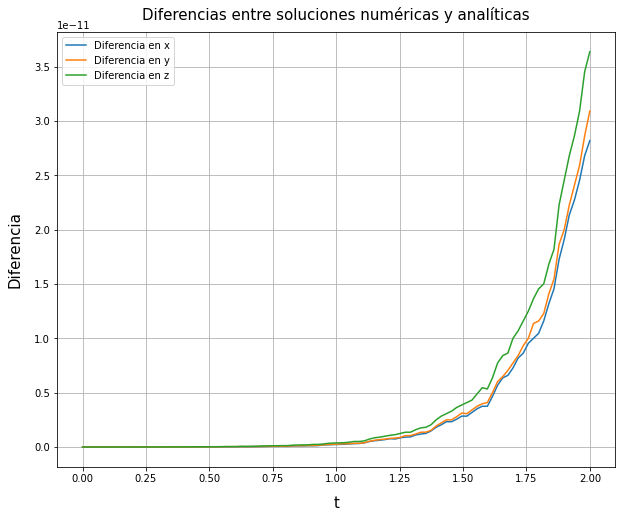

In [148]:
#Graficamos estas diferencias
#Nótese que el error va aumentando a medida que t crece

plt.figure( figsize=(10,8) )

plt.plot(t_,Dif_x,label='Diferencia en x')
plt.plot(t_,Dif_y,label='Diferencia en y')
plt.plot(t_,Dif_z,label='Diferencia en z')

plt.xlabel('t',size=15,labelpad=12)
plt.ylabel('Diferencia',size=15,labelpad=12)
plt.title('Diferencias entre soluciones numéricas y analíticas',pad=12,size=15)

plt.legend()
plt.grid()